In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Problem Statement : 
        
##### Predict the Student overall mark affected by other variables such as Gender, Ethencity, Parental level of education, Lunch and Test Preparation

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
## Shape of the Dataset

df.shape

(1000, 8)

### **Dataset information**

##### gender : sex of students  ->  (male, female)
##### race_ethnicity : ethnicity of students  ->  (group A, group B, group C)
##### parental_level_of_education : parent's final education  ->  (bachelor's degree, some college, master's degree, associate's degree, high school)
##### lunch : having lunch before test  ->  (standard or free/reduced)
##### test_preparation_course : complete or not complete before test
##### math_score
##### reading_score
##### writing_score

## **Data checks to perform**

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

In [6]:
# check the missing values

df.isna().sum()

#there are no missing values in the dataset|

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
## check the data types of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
## check the number of unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
## check statistics of the dataset

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
## Exploring the dataset

In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [15]:
print('Categories in "gender" variable:    ', end=' ')
print(df['gender'].unique())

print('Categories in "race_ethnicity" variable:    ', end=' ')
print(df['race_ethnicity'].unique())

print('Categories in "parental level of education" variable:    ', end=' ')
print(df['parental_level_of_education'].unique())

print('Categories in "lunch" variable:    ', end=' ')
print(df['lunch'].unique())

print('Categories in "test preparation course" variable:    ', end=' ')
print(df['test_preparation_course'].unique())




Categories in "gender" variable:     ['female' 'male']
Categories in "race_ethnicity" variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in "parental level of education" variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in "lunch" variable:     ['standard' 'free/reduced']
Categories in "test preparation course" variable:     ['none' 'completed']


In [16]:
# Now define numerical and categorical variables
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('Numerical features: ', numerical_features)
print('Categorical features: ', categorical_features)


Numerical features:  ['math_score', 'reading_score', 'writing_score']
Categorical features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [ ]:
##

In [17]:
## Now we add total score and average score columns to the dataset

df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

df['average_score'] = df['total_score'] / 3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [18]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
print(f'The number of students who scored full marks in reading is: {reading_full}')

writing_full = df[df['writing_score'] == 100]['average_score'].count()
print(f'The number of students who scored full marks in writing is: {writing_full}')

math_full = df[df['math_score'] == 100]['average_score'].count()
print(f'The number of students who scored full marks in math is: {math_full}')


The number of students who scored full marks in reading is: 17
The number of students who scored full marks in writing is: 14
The number of students who scored full marks in math is: 7


In [19]:
math_less_20 = df[df['math_score'] < 20]['average_score'].count()
print(f'The number of students who scored less than 20 in math is: {math_less_20}')

reading_less_20 = df[df['reading_score'] < 20]['average_score'].count()
print(f'The number of students who scored less than 20 in reading is: {reading_less_20}')

writing_less_20 = df[df['writing_score'] < 20]['average_score'].count()
print(f'The number of students who scored less than 20 in writing is: {writing_less_20}')

The number of students who scored less than 20 in math is: 4
The number of students who scored less than 20 in reading is: 1
The number of students who scored less than 20 in writing is: 3


In [21]:
## from above obeservation students have performed worst in math

## Best performance reading section

### Exploring data visulization

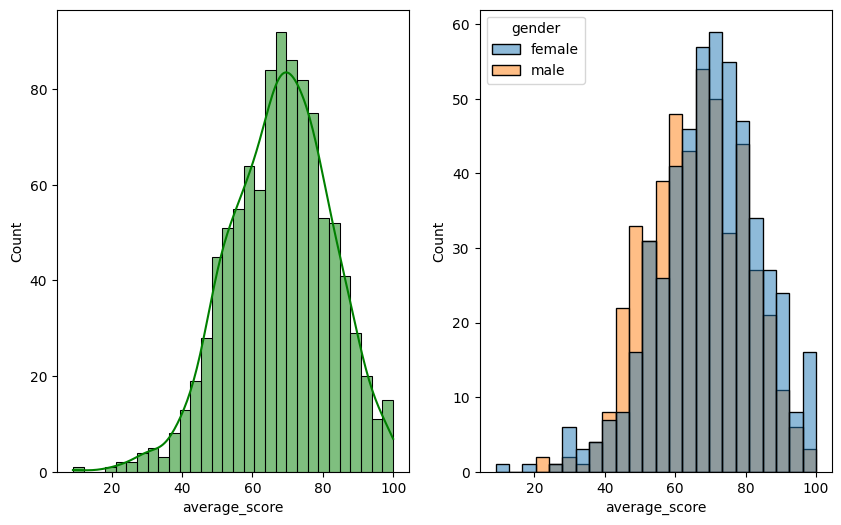

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplot(121)
sns.histplot(data=df, x='average_score', kde=True, color='g', bins=30, )
plt.subplot(122)
sns.histplot(data=df, x='average_score', hue='gender')
plt.show()


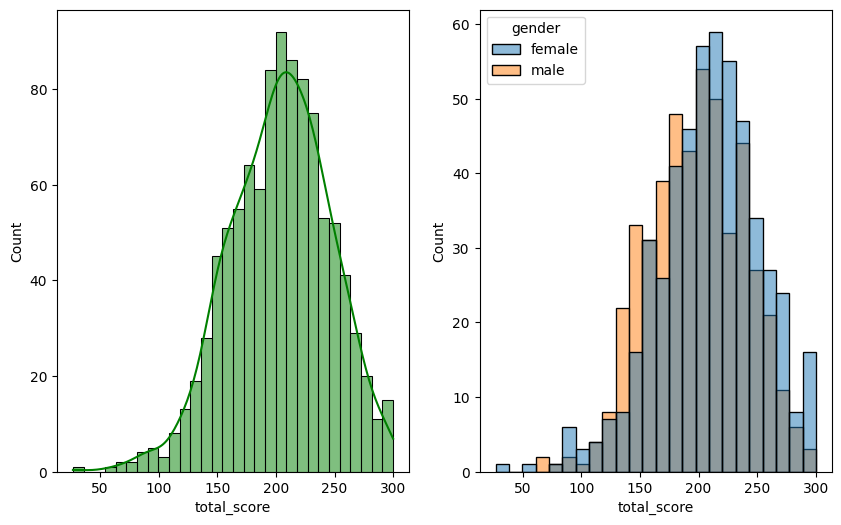

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplot(121)
sns.histplot(data=df, x='total_score', kde=True, color='g', bins=30, )
plt.subplot(122)
sns.histplot(data=df, x='total_score', hue='gender')
plt.show()

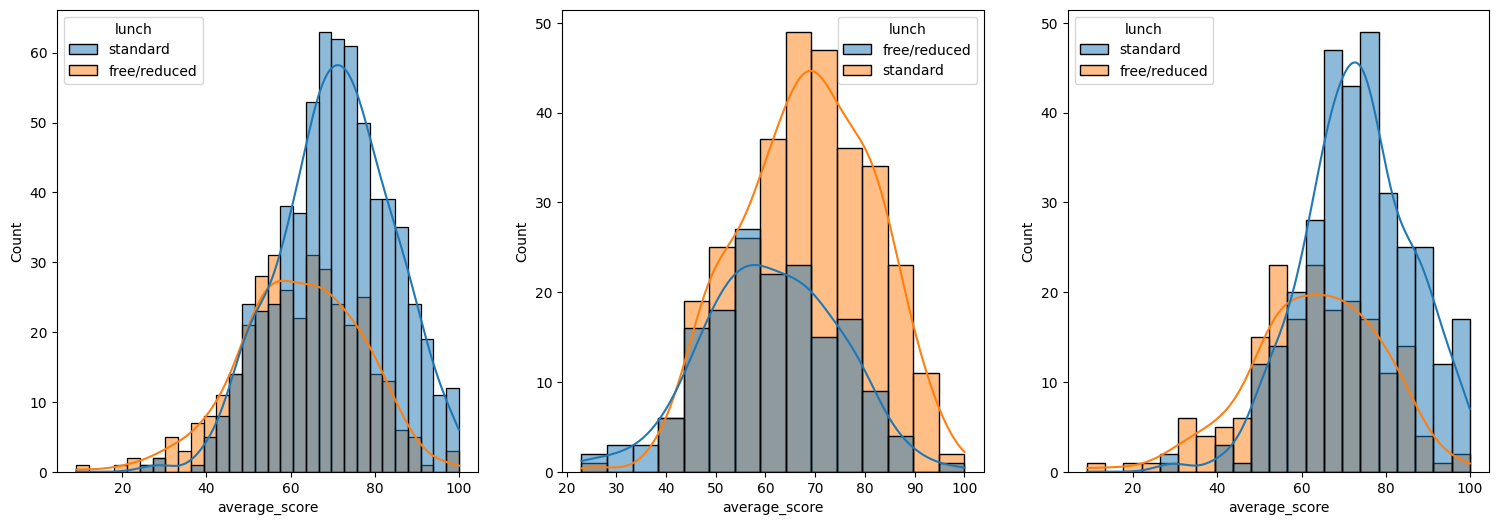

In [27]:
fig, ax = plt.subplots(figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, color='g', bins=30, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'male'], x='average_score', hue='lunch', kde=True)
plt.subplot(143)
sns.histplot(data=df[df.gender == 'female'], x='average_score', hue='lunch', kde=True)
plt.show()

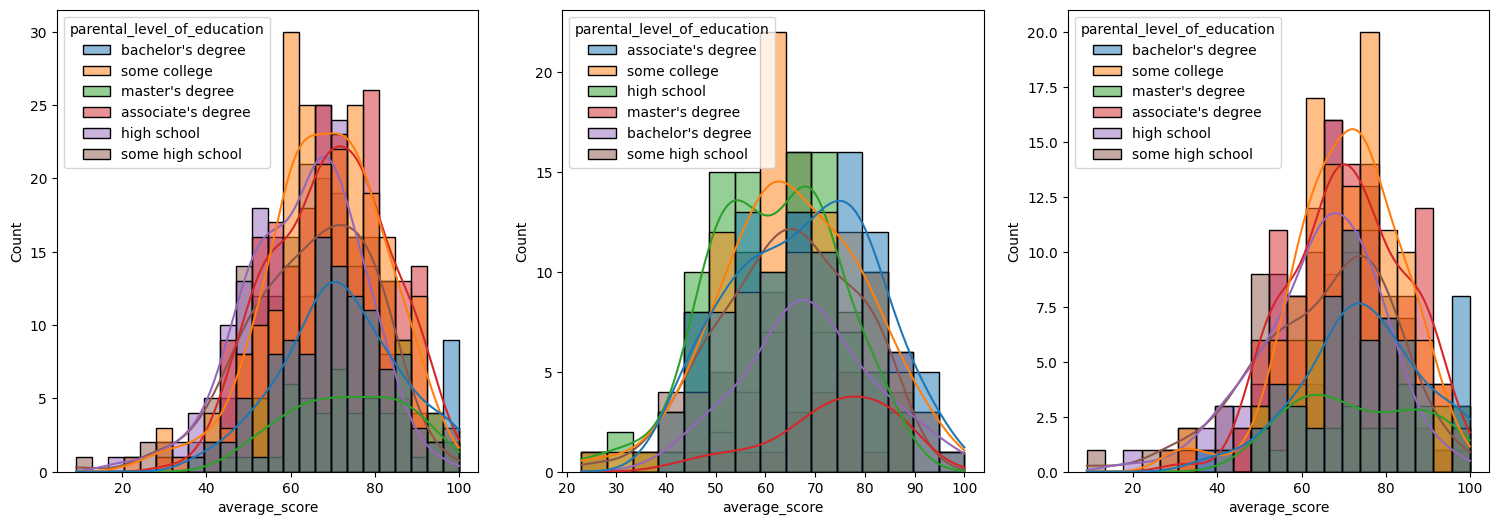

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

In [31]:
##In general parent's education don't help student perform well in exam.
##2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
##3rd plot we can see there is no effect of parent's education on female students.

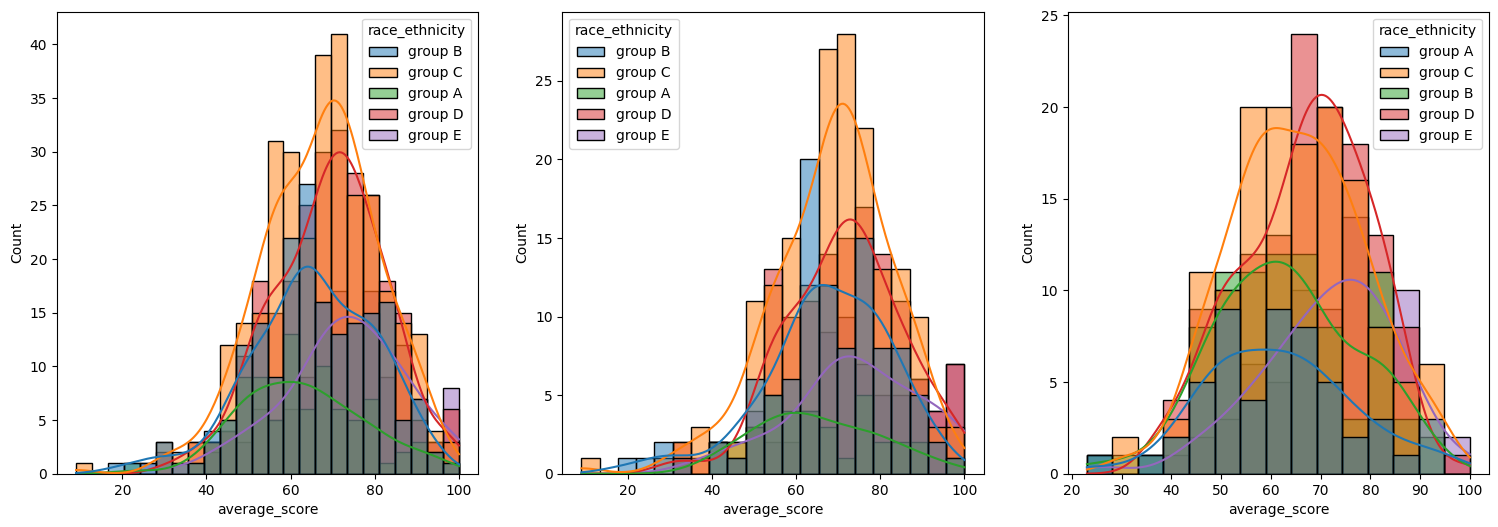

In [35]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

In [36]:
#Students of group A and group B tends to perform poorly in exam.
#Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female